<a href="https://colab.research.google.com/github/mrospond/kik/blob/main/W01_KiK_entropia_wst%C4%99p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Potrzebne biblioteki...

# Obliczenia matematyczne, dla nas głównie logarytm
import math

# Generowanie liczb losowych
import random

# Rysowanie standardowych wykresów
import matplotlib.pyplot as plt
# Obróbka statystyczna przy rysowaniu wykresów i formatowaniu ich wyglądu
import seaborn as sns
sns.set()
# Rysowanie wykresów z interakcją użytkownika (np. obracanie)
import plotly.express as px

# Pracy z wektorami i macierzami
import numpy as np

# Tabelaryczneja reprezentacja danych (ramki danych)
import pandas as pd

# Obliczenia probabilistyczne
## Rozkład dwumianowy (Bernoulliego)
from scipy.stats import binom
## Rozkład normalny (Gaussa)
from scipy.stats import norm
## Dowolny rozkład dyskretny
from scipy.stats import rv_discrete
## Entropia różnicowa
from scipy.stats import differential_entropy
## Entropia Shannona i dywergencja Kullbacka-Leiblera
from scipy.stats import entropy
## Estymacja rozkładu prawdopodobieństwa z próbek
from scipy.stats import gaussian_kde

# Entropia

## Entropia źródła dyskretnego

Dla rozkładu prawdopodobieństwa:

$$ (p_1, p_2, p_3, \dots, p_N), \quad \sum_{i=1}^N{p_i} = 1 $$

możemy policzyć entropię jako:

$$ H(p_1, p_2, p_3, \dots, p_N) = -\sum_{i=1}^N{p_i} \log{p_i} \quad \text{[bit/wiadomość]} $$
($\log = \log_2$)

In [ ]:
#@title { run: "auto" }
#@markdown Weźmy sobie zmienną losową realizowaną z 4 różnymi wartościami A, B, C, D (możemy powiedzieć, że to są cztery różne wiadomości)

#@markdown Prawdopodobieństwa $p_A$, $p_B$, $p_C$ (automatycznie wyliczamy $p_D = 1-p_A-p_B-p_C$):
pA = 0  #@param {type: "slider", min:0, max:1, step:0.05}
pB = 0.25  #@param {type: "slider", min:0, max:1, step:0.05}
pC = 0.25  #@param {type: "slider", min:0, max:1, step:0.05}

assert pA+pB+pC <= 1, "Suma prawdopodobieństw nie może przekracać 1.0!"

#@markdown Jednostka entropii:
units = "bit" #@param ["ban/dit/hartley", "nat", "bit"]

podstawa = {
    "ban/dit/hartley": 10,
    "nat": math.e,
    "bit": 2
}

pD = 1-pA-pB-pC
prawd = [pA, pB, pC, pD]
rozklad_prawdopodobienstwa = np.array(prawd)

H = entropy(rozklad_prawdopodobienstwa, base = podstawa[units])

print(f'Rozkład prawdopodobieństwa: pA = {pA}, pB = {pB}, pC = {pC}, pD = {pD}')
print(f'Entropia H({prawd}) = {H} {units}')

Rozkład prawdopodobieństwa: pA = 0, pB = 0.25, pC = 0.25, pD = 0.5
Entropia H([0, 0.25, 0.25, 0.5]) = 1.5 bit


Poeksperymentujmy:
*   wartość minimalna?
*   co jeśli np. $p_D=0$?
*   wartość maksymalna?

In [ ]:
#@title Próbkowanie rozkładu { run: "auto" }
#@markdown Możemy zobaczyć, jak wygląda generowanie zmiennych (wiadomości ze źródła o określonym rozkładzie)

#@markdown Ile próbek?
ile = 16  #@param {type: "slider", min:1, max:30, step:1}

#@markdown Prawdopodobieństwa $p_A$, $p_B$, $p_C$
pA = 0.6  #@param {type: "slider", min:0, max:1, step:0.01}
pB = 0.27  #@param {type: "slider", min:0, max:1, step:0.01}
pC = 0  #@param {type: "slider", min:0, max:1, step:0.01}

assert pA+pB+pC <= 1, "Suma prawdopodobieństw nie może przekracać 1.0!"

# Funkcja losuje akurat tylko liczby, a chcemy wiadomości będące literami
wartosci_zmiennej_losowej = np.array([0, 1, 2, 3])
alfabet = {
    0: "A",
    1: "B",
    2: "C",
    3: "D"
}

pD = 1-pA-pB-pC
rozklad_prawdopodobienstwa = np.array([pA, pB, pC, pD])
custm = rv_discrete(values=(wartosci_zmiennej_losowej, rozklad_prawdopodobienstwa))

probka_liczby = custm.rvs(size=ile)
probka = [alfabet[key] for key in probka_liczby]

# Dla danego rozkładu możemy automatycznie mieć wyliczoną entropię (w natach!)
H = custm.entropy()/math.log(2)

print(f'Rozkład prawdopodobieństwa: pA = {pA}, pB = {pB}, pC = {pC}, pD = {pD}; z entropią = {H} bit')
print(probka)

Rozkład prawdopodobieństwa: pA = 0.6, pB = 0.27, pC = 0, pD = 0.13; z entropią = 1.3348450434671353 bit
['B', 'A', 'A', 'A', 'A', 'D', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B']


Wiadomo, że:

$$ 0 \leq H(p_1, p_2, p_3, \dots, p_N) \leq \log{N} $$

In [ ]:
#@title Jakość generatora liczb losowych { run: "auto" }

# Pomocnicza funkcja do obrazowania serii wylosowanych danych
def licz_entr_cyfry(ser, printing: bool=True) -> None:
  if printing:
    print(ser)
  else:
    print(ser[:math.floor(len(ser)/10)])
  prawd = []
  cyfry = list(range(10))
  for c in cyfry:
    ile = [num.count(str(c)) for num in ser]
    pr = sum(ile)/(2*len(ser))
    prawd.append(pr)
  H = entropy(prawd, base = podstawa[units])
  print(f'Entropia H({prawd}) = {H} {units}, gdy max. H = {math.log2(len(prawd))}')


#@markdown Przykład ewidentnie słabego generatora

i = 2
liczby = []

#@markdown Można wybrać modulus do generatora
modulus = "101" #@param [101, 107, 113, 131, 137, 149, 167, 173, 179, 191]
while(len(liczby)<30):
  i = (i^3+2*i^2+1) % int(modulus)
  liczby.append(i)

print(liczby)

#@markdown od (w Pythonie lista indeksowana od 0)
od = 0 #@param {type: "slider", min:0, max:29, step:1}
#@markdown do
do = 10 #@param {type: "slider", min:1, max:30, step:1}
assert od < do, "od-do ma mieć sens!"

seria_gen = [format(num, '0' + str(2) + 'd') for num in liczby[od:do]]
licz_entr_cyfry(seria_gen)

[6, 10, 30, 34, 1, 7, 21, 59, 65, 98, 65, 98, 65, 98, 65, 98, 65, 98, 65, 98, 65, 98, 65, 98, 65, 98, 65, 98, 65, 98]
['06', '10', '30', '34', '01', '07', '21', '59', '65', '98']
Entropia H([0.25, 0.15, 0.05, 0.1, 0.05, 0.1, 0.1, 0.05, 0.05, 0.1]) = 3.103701696057348 bit, gdy max. H = 3.321928094887362


In [ ]:
#@title { run: "auto" }
#@markdown Generator `random` dający rozkład równomierny 

print("Seria liczb takiej samej długości jak poprzednio:")
random_numbers = [random.randint(0, 99) for _ in range(len(seria_gen)+1)]
seria = [format(num, '0' + str(2) + 'd') for num in random_numbers]
licz_entr_cyfry(seria)

#@markdown Długość reprezentacji
reprez = 2 #@param {type: "slider", min:2, max:5, step:1}

print("Większa seria liczb:")
dlug = 10**reprez
random_numbers = [random.randint(0, dlug-1) for _ in range(dlug)]
seria = [format(num, '0' + str(reprez) + 'd') for num in random_numbers]
licz_entr_cyfry(seria,False)

Seria liczb takiej samej długości jak poprzednio:
['86', '21', '00', '93', '46', '78', '59', '60', '74', '08', '38']
Entropia H([0.18181818181818182, 0.045454545454545456, 0.045454545454545456, 0.09090909090909091, 0.09090909090909091, 0.045454545454545456, 0.13636363636363635, 0.09090909090909091, 0.18181818181818182, 0.09090909090909091]) = 3.152391277629867 bit, gdy max. H = 3.321928094887362
Większa seria liczb:
['49', '87', '11', '27', '32', '49', '16', '60', '12', '98']
Entropia H([0.155, 0.125, 0.115, 0.085, 0.125, 0.07, 0.1, 0.035, 0.095, 0.095]) = 3.243276443909177 bit, gdy max. H = 3.321928094887362


### Entropia źródła binarnego

Dla źródła generującego tylko dwie wiadomości:

$$p_A = p \in [0,1], \quad p_B = 1-p$$

mamy entropię źródła binarnego oznaczaną standardowo $H(p)$:

$$ H(p,1-p) = H(p) = -p\lg{p} - (1-p)\lg{(1-p)} $$

In [ ]:
#@title { run: "auto" }
#@markdown Nie musimy się męczyć wpisując wzory dla konkretnego rozkładu prawdopodobieństwa (w tym przypadku dwupunktowego)

#@markdown Prawdopodobieństwo zajścia zdarzenia:
p1 = 0.4  #@param {type: "slider", min:0, max:1, step:0.01}

prawd = np.array([p1, 1-p1])

units = "bit"
H = entropy(prawd, base = podstawa[units])

print(f'Entropia H({p1},{1-p1}) = {H} {units}')

Entropia H(0.4,0.6) = 0.9709505944546688 bit


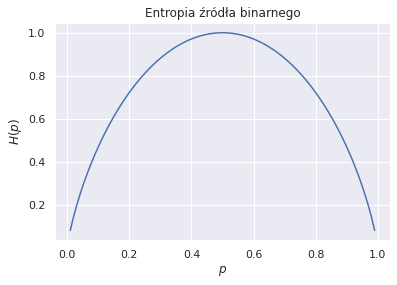

In [ ]:
#@markdown Narysujemy wykres entropii źródła binarnego (rozkładu dwupunktowego)

p = np.linspace(0.01, 0.99, 99)
H = -p*np.log2(p) - (1-p)*np.log2(1-p)

plt.title('Entropia źródła binarnego')
plt.xlabel('$p$')
plt.ylabel('$H(p)$')
plt.plot(p, H)
plt.grid('minor')
plt.show()

### Entropia źródła ternarnego

Dla źródła generującego trzy wiadomości:

$$p_A = p_0, \quad p_B = p_1, \quad p_0+p_1 \in [0,1], \quad p_C = 1 - p_0 - p_1$$

mamy entropię:

$$ H(p_1,p_2,1-p_1-p_2) = -p_0\lg{p_0} - p_1\lg{p_1} - (1-p_0-p_1)\lg{(1-p_0-p_1)}$$

In [ ]:
#@markdown Narysujemy wykres entropii źródła ternarnego

zakres = [x/100 for x in range(1,100)] # 0.01-0.99
p0 = []
p1 = []
H = []

for p0a in zakres:
  for p1a in zakres:
    if (p0a+p1a < 1):
      p0.append(p0a)
      p1.append(p1a)
      H.append(entropy([p0a,p1a,1-p0a-p1a], base=2))

print("Niedokładność, bo bierzemy prawdopodobieństwa co 0.01:")
print(f"Wartość maksymalna entropii ternarnej = {max(H)}, podczas gdy log(3) = {math.log2(3)}")

df = pd.DataFrame(
    {
    'wartość':H, 'p_0':p0, 'p_1':p1, 'H':H
  }
)
fig = px.scatter_3d(df, x='p_0', y='p_1', z='H',
                    color='wartość',
                    title="Entropia źródła ternarnego",
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(scene = dict(
    xaxis_title='p_0',
    yaxis_title='p_1',
    zaxis_title='entropia')
)
fig.show()

Niedokładność, bo bierzemy prawdopodobieństwa co 0.01:
Wartość maksymalna entropii ternarnej = 1.58481870497303, podczas gdy log(3) = 1.584962500721156


Wcześniej mieliśmy zadany rozkład, ale oczywiście możemy sobie obejrzeć dla różnych typowych rozkładów, np. dwumianowego...

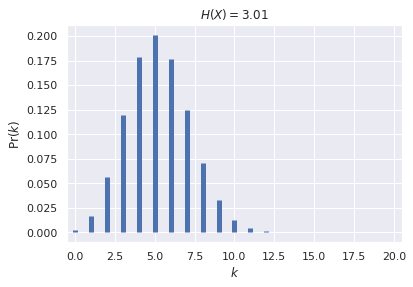

In [ ]:
#@title { run: "auto" }
#@markdown A teraz dla całego rozkładu dwumianowego $B(N,\theta)$: $\Pr\{k\} = \binom{N}{k}\theta^k(1-\theta)^{N-k}$

N = 20  #@param
theta = 0.26  #@param {type: "slider", min:0, max:1, step:0.01}

assert isinstance(N, int) and N>1, "N musi być wartością całkowitą większą od 1!"

xmin=0
xmax=N
k = range(xmin,xmax+1)
binom_dist = binom(n=N, p=theta)
entropy_bin = binom_dist.entropy()/math.log(2)
B = binom_dist.pmf(k)

plt.vlines(k,0,B,linewidth=100/N)
plt.title(f'$H(X) = {entropy_bin:.2f}$')
plt.xlim(xmin-0.5,xmax+0.5)
plt.xlabel(f'$k$')
plt.ylabel(f'$\Pr(k)$')
plt.show()

[6 4 2 ... 6 7 4]


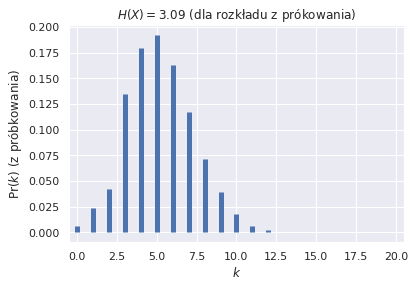

In [ ]:
#@title { run: "auto" }
#@markdown Tutaj po prostu próbkujemy z rozkładu (tj. generujemy wyniki na podstawie danego rozkładu)...

ile = 1200  #@param

assert ile>1, "musimy losować więcej razy niż 1!"

wynik = binom_dist.rvs(ile)
print(wynik)

wartosci = np.arange(N+2)

ile_razy, _ = np.histogram(wynik, bins=wartosci)
prawd = ile_razy / len(wynik)

h = entropy(prawd, base = 2)

plt.vlines(wartosci[:-1],ymin=0,ymax=prawd,linewidth=100/N)
plt.title(f'$H(X) = {h:.2f}$ (dla rozkładu z próbkowania)')
plt.xlim(xmin-0.5,xmax+0.5)
plt.xlabel(f'$k$')
plt.ylabel(f'$\Pr(k)$ (z próbkowania)')
plt.show()

## Entropia ciągłego rozkładu prawdopodobieństwa (entropia różnicowa)

Dla funkcji gęstości prawdopodobieństwa:

$$ f: X \rightarrow [0,+\infty), \quad \int_{-\infty}^{+\infty}{f(x)dx} = 1 $$

możemy policzyć entropię różnicową jako uogólnienie dla rozkładu dyskretnego:

$$ h(X) = E[-\log{f(X)}] = -\int_{X}{f(x)\log{f(x)}dx} \quad \text{[bit]} $$

Entropia źródła ciągłego to tak naprawdę:

$$ H(X) = h(X) - \lim_{\Delta{x} \rightarrow 0} \log{\Delta{x}} $$

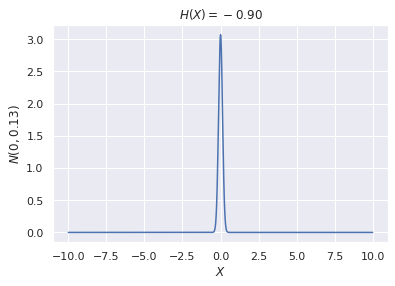

In [ ]:
#@title Entropia różnicowa dla rozkładu normalnego (Gaussa) { run: "auto" }
#@markdown Można zobaczyć, jak to się zmienia...

x_min = -10 #@param
x_max = 10 #@param

assert x_min < x_max, "Zakres musi być zdefiniowany prawidłowo!"

loc = 0  #@param {type: "slider", min:-10, max:10, step:0.5}
scale = 0.13 #@param {type: "slider", min:0.01, max:10, step:0.01}

if x_min > loc-3*scale:
  x_min = loc-3*scale

if x_max < loc+3*scale:
  x_max = loc+3*scale

x_axis = np.arange(x_min, x_max, 0.01)

normal_dist = norm(loc=loc, scale=scale)
entropy_n = normal_dist.entropy()/math.log(2)
y_axis = normal_dist.pdf(x_axis)
plt.plot(x_axis, y_axis)
plt.title(f'$H(X) = {entropy_n:.2f}$')
plt.xlabel(f'$X$')
plt.ylabel(f'$N({loc},{scale})$')
plt.show()

Jak widać, entropia różnicowa może być ujemna!

Z wszystkich rozkładów o tej samej wariancji rozkład Gaussa daje największą entropię różnicową.